In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
np.nan

nan

In [4]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df = df.drop("id", axis=1)

In [7]:
df = df.drop("last_review", axis=1)

In [8]:
df = df.drop("name", axis=1)

In [9]:
df = df.drop("host_name", axis=1)

In [10]:
df = df.drop("host_id", axis=1)

In [11]:
df.index.name = 'Id'

In [12]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Id,,,,,,,,,,,
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27


In [13]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [14]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
df.shape

(48895, 11)

In [16]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

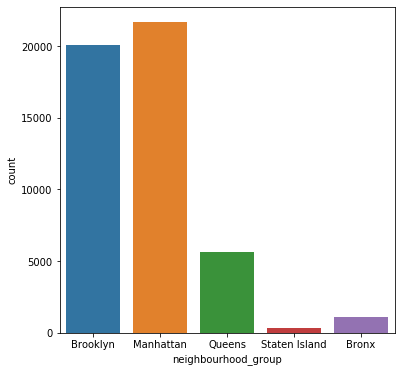

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="neighbourhood_group")
plt.show()

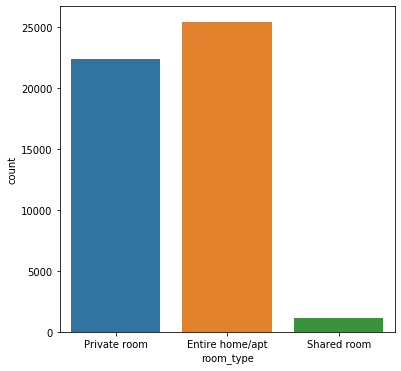

In [19]:

plt.figure(figsize=(6,6))
sns.countplot(data=df, x="room_type")
plt.show()

[]

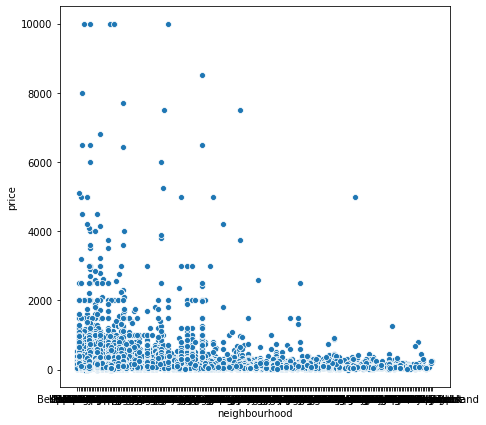

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="neighbourhood",y="price")
plt.plot()

In [21]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64","int64"])

In [22]:
df_cat

,neighbourhood_group,neighbourhood,room_type
Id,,,
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [25]:
df_cat

,neighbourhood_group,neighbourhood,room_type
Id,,,
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0
...,...,...,...
48890,1,13,1
48891,1,28,1
48892,2,94,0


In [26]:
#plt.figure()
#sns.scatterplot(data=df_num,y="price",x=col)
#plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [28]:
#for col in df_cat:
  #  ss = StandardScaler()
  #  df_cat = ss.fit_transform(df_cat[col])

In [29]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [30]:
df_new

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
Id,,,,,,,,,,,
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,108,1
1,40.75362,-73.98377,225,1,45,0.38,2,355,2,127,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,2,94,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,41,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,2,61,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,1,13,1
48891,40.70184,-73.93317,40,4,0,0.00,2,36,1,28,1
48892,40.81475,-73.94867,115,10,0,0.00,1,27,2,94,0


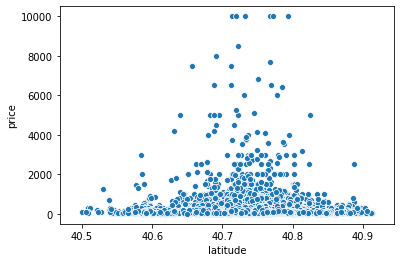

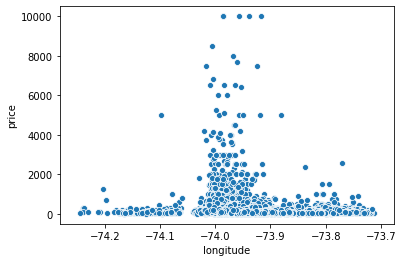

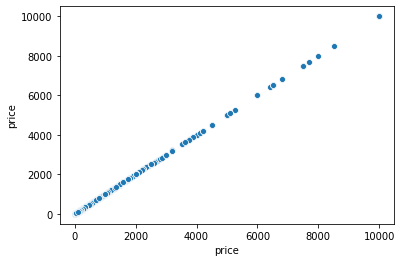

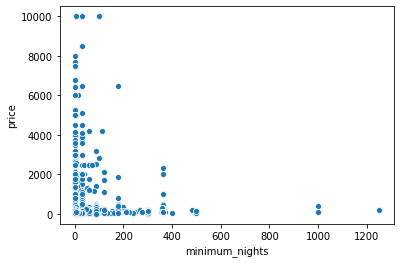

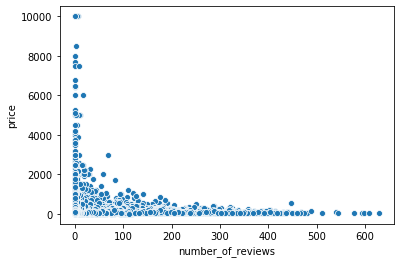

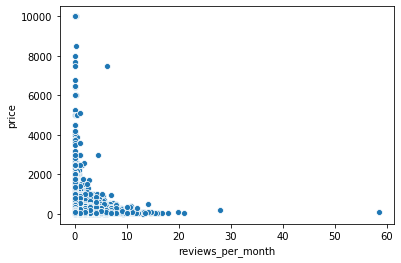

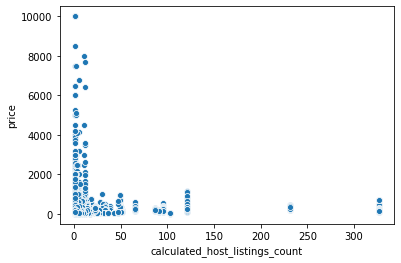

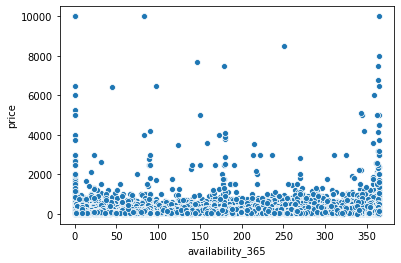

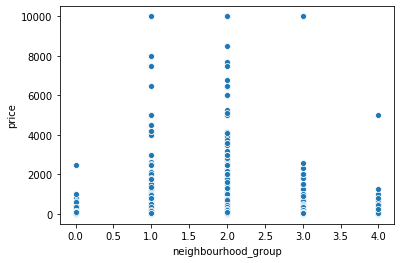

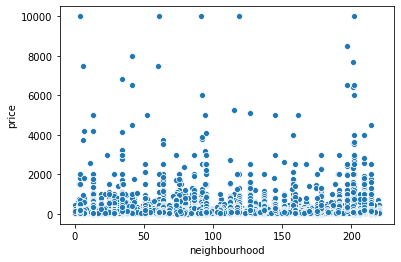

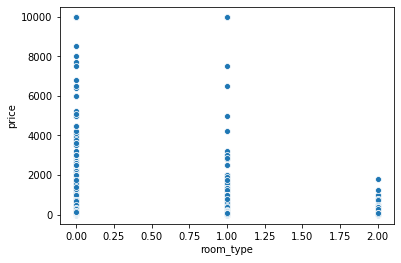

In [31]:
for col in df_new:
    plt.figure()
    sns.scatterplot(data=df_new,y="price",x=col)
    plt.show()

In [32]:
corr = df.corr()

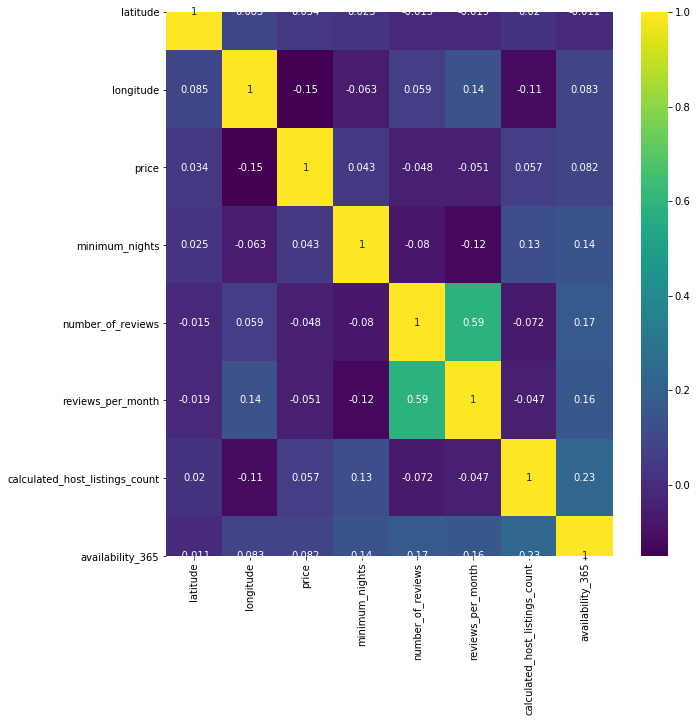

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

In [34]:
X = df_new.drop('price', axis = 1)
y = df_new['price']

In [35]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
Id,,,,,,,,,,
0,40.64749,-73.97237,1,9,0.21,6,365,1,108,1
1,40.75362,-73.98377,1,45,0.38,2,355,2,127,0
2,40.80902,-73.94190,3,0,0.00,1,365,2,94,1
3,40.68514,-73.95976,1,270,4.64,1,194,1,41,0
4,40.79851,-73.94399,10,9,0.10,1,0,2,61,0
...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,1,13,1
48891,40.70184,-73.93317,4,0,0.00,2,36,1,28,1
48892,40.81475,-73.94867,10,0,0.00,1,27,2,94,0


In [36]:
y

Id
0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
rf =  RandomForestRegressor(n_estimators=300,max_depth = 50)

In [95]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
y_pred = rf.predict(X_test)

In [97]:
y_pred

array([107.50333333, 184.72333333,  83.88      , ...,  60.46666667,
       145.60333333,  36.36333333])

In [98]:
y_test

Id
18907     60
46663    250
19757     80
9705      95
3322     450
        ... 
6860      40
42977    150
408       50
6778     105
35869     50
Name: price, Length: 9779, dtype: int64

In [99]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Square :'," ", np.sqrt(metrics.r2_score(y_test,y_pred)))

MAE :   66.77705136695575
MSE :   55508.74801255744
RMAE :   235.60294567886336
R-Square :   0.3669067408097892


In [100]:
accuracy_train = rf.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.8785685623119315
0.13462055645166182
